In [1]:
#Be sure you use GPU mode, otherwise it will take forever to train CNN
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


In [2]:
#Load ImageNet pre-trained VGG19
import torchvision
model = torchvision.models.vgg19(pretrained=True)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

#Use the pre-trained weights from VGG19 to build our own classifier

Let input image size = (224, 224, 3), 
Output has 5 classes: Angry, Happy, Sad, Surprised, Unknown

In [3]:
import torch.nn as nn
# fix the weight of convolution layers
model.features.eval()

# modify classifier
model.classifier = torch.nn.Sequential(
  nn.Linear(25088, 4096),
  nn.ReLU(inplace=True),
  nn.Dropout(p=0.5, inplace=False),
  nn.Linear(4096, 4096),
  nn.ReLU(inplace=True),
  nn.Dropout(p=0.5, inplace=False),
  torch.nn.Linear(4096, 5))

In [4]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [5]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [6]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Connect to Google drive

In [7]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [8]:
from torchvision import transforms
transformer = transforms.Compose([
     transforms.Resize((224, 224)),       
     transforms.ToTensor(),                     
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [9]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/Image folders/train", transform = transformer)

In [10]:
classes = train_dataset.classes
classes_index = train_dataset.class_to_idx
print(classes)
print(classes_index)

['angry', 'happy', 'sad', 'surprised', 'unknown']
{'angry': 0, 'happy': 1, 'sad': 2, 'surprised': 3, 'unknown': 4}


In [11]:
import torch.utils.data as Data
loader = Data.DataLoader(dataset=train_dataset,batch_size=4,shuffle=True)

#Try to send one batch of training images to my CNN

In [12]:
for batchX, batchY_hat in loader:
  break;
print(batchX.shape, batchY_hat.shape, batchY_hat)

torch.Size([4, 3, 224, 224]) torch.Size([4]) tensor([3, 2, 3, 2])


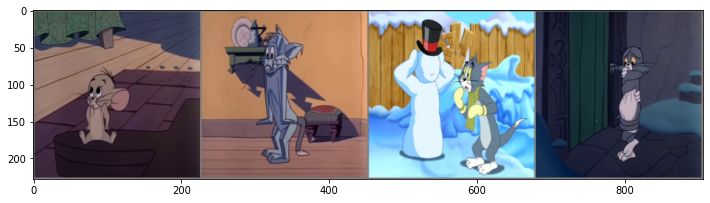

['surprised', 'sad', 'surprised', 'sad']


In [13]:
import numpy as np
import matplotlib.pyplot as plt
imgTensor = torchvision.utils.make_grid(batchX)
imgArray = imgTensor.numpy() 
imgArray1 = np.zeros((imgArray.shape[1], imgArray.shape[2], 3))
imgArray1[:,:,0] = imgArray[0, :, :]  
imgArray1[:,:,1] = imgArray[1, :, :]
imgArray1[:,:,2] = imgArray[2, :, :]
imgArray1 = imgArray1*0.5+0.5
plt.figure(figsize=(12, 6))
plt.imshow(imgArray1)
plt.show()
print([classes[i] for i in batchY_hat])

In [14]:
tensorY=model(batchX.to(device))
print(tensorY.shape,"\n", tensorY)

torch.Size([4, 5]) 
 tensor([[ 0.2441,  0.1934, -0.1210,  0.0009, -0.0933],
        [-0.0132,  0.0988, -0.0497,  0.1776, -0.1668],
        [-0.0629,  0.0807,  0.1508, -0.0178, -0.2046],
        [ 0.3224,  0.1372,  0.1162,  0.0435, -0.0312]], device='cuda:0',
       grad_fn=<AddmmBackward>)


In [15]:
loss = loss_func(tensorY, batchY_hat.to(device))
print(tensorY.shape, batchY_hat.shape, loss)

torch.Size([4, 5]) torch.Size([4]) tensor(1.6455, device='cuda:0', grad_fn=<NllLossBackward>)


#Training loop

In [16]:
lossLst = []
accuracyLst = []
for epoch in range(1, 4):
  print("\nepoch = ", epoch, end = ", ")
  print("batch: ", end="")
  for step, (batch_x, batchY_hat) in enumerate(loader):
    if(step%5==0):
      print(step, end = ", ")
    tensorY = model(batch_x.to(device))
    loss = loss_func(tensorY, batchY_hat.to(device))
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    correct = 0
    tensorY = torch.softmax(tensorY, 1)
    MaxIdxOfEachRow = torch.max(tensorY, 1)[1]
    for i in range(batchY_hat.shape[0]):
      if (int(MaxIdxOfEachRow[i]) == int(batchY_hat[i])):
        correct += 1
    accuracy = correct/batchY_hat.shape[0]
    accuracyLst.append(accuracy)


epoch =  1, batch: 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 
epoch =  2, batch: 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 
epoch =  3, batch: 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 

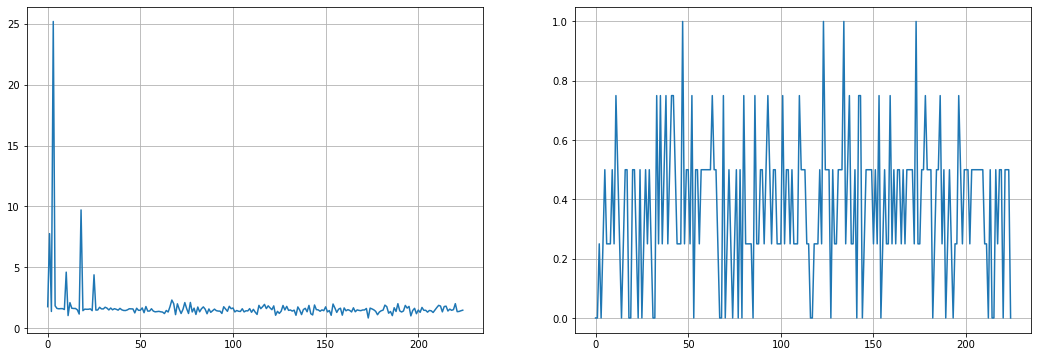

In [17]:
fig=plt.figure(figsize=(18, 6))
fig.add_subplot(1, 2, 1) 
plt.plot(lossLst)
plt.grid()

fig.add_subplot(1, 2, 2) 
plt.plot(accuracyLst)
plt.grid()
plt.show()

#Test

In [18]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [19]:
from google.colab import files
uploaded = files.upload()

Saving frame24.jpg to frame24 (1).jpg


In [20]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

frame24.jpg


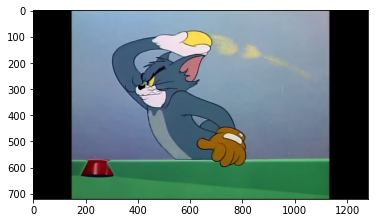

In [21]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(fname)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [22]:
from PIL import Image
PILImg= Image.fromarray(image.astype('uint8')).convert('RGB')
PILImg = transformer(PILImg)
imageTensor = torch.unsqueeze(PILImg, 0)
imageTensor.shape

torch.Size([1, 3, 224, 224])

In [23]:
tensorY = model(imageTensor.to(device))

In [24]:
tensorY = torch.softmax(tensorY, 1)
print(tensorY)

tensor([[0.1225, 0.1490, 0.1598, 0.2189, 0.3498]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)


In [25]:
print(classes)

['angry', 'happy', 'sad', 'surprised', 'unknown']
